In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

In [41]:
raw_csv_data = pd.read_csv("C:/Users/Mandar/Downloads/Index2018.csv")  #import the dataset

In [42]:
df_comp = raw_csv_data.copy()

In [43]:
df_comp.head() #examining the data 

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [44]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [45]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [46]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [47]:
df_comp.spx.isna().sum()

0

In [48]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [49]:
import matplotlib.pyplot as plt #plotting the data

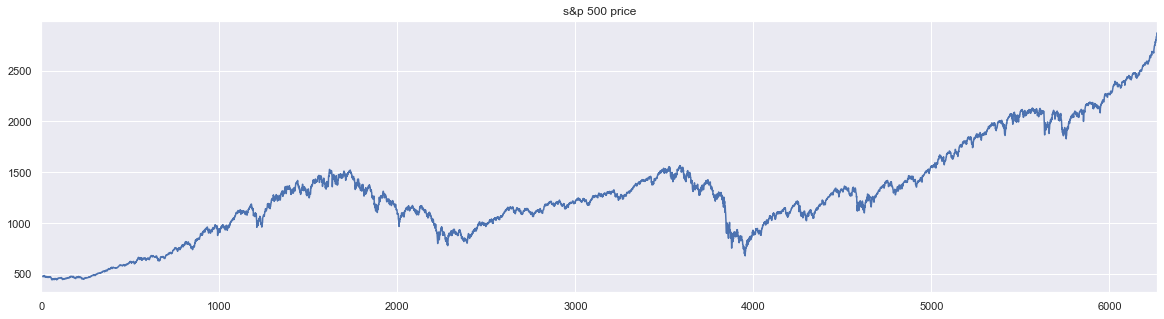

In [50]:
df_comp.spx.plot(figsize=(20,5),title="s&p 500 price")
plt.show()

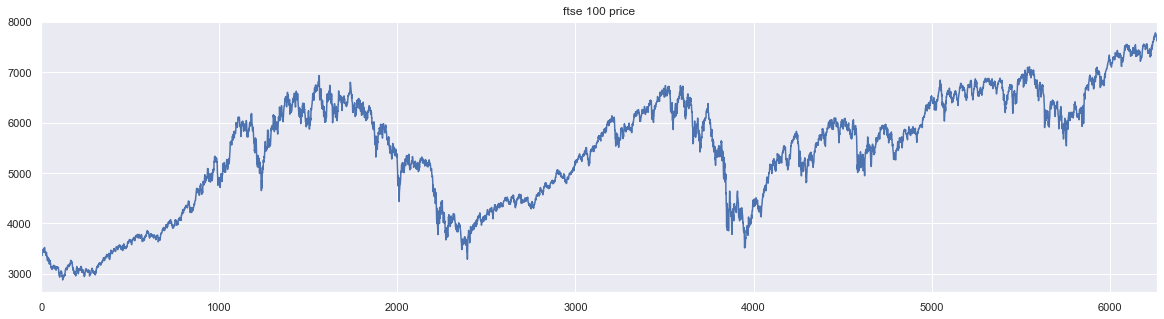

In [51]:
df_comp.ftse.plot(figsize=(20,5),title="ftse 100 price")
plt.show()

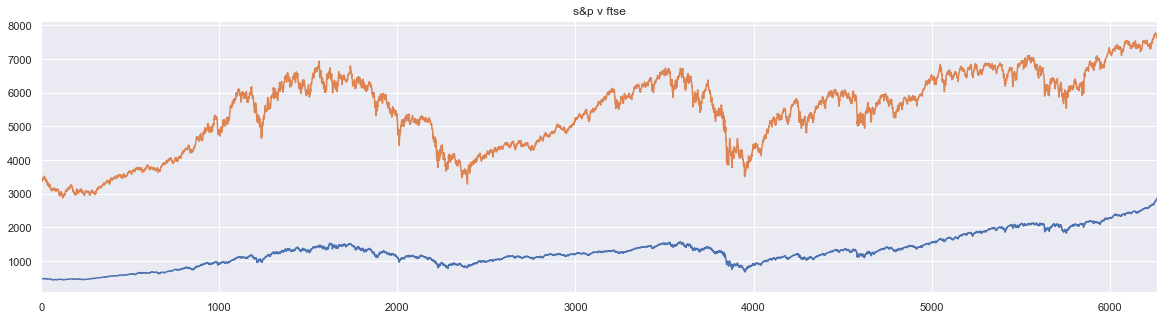

In [52]:
df_comp.spx.plot(figsize=(20,5),title="s&p 500 price")
df_comp.ftse.plot(figsize=(20,5),title="ftse 100 price")
plt.title("s&p v ftse")
plt.show()

# quantile-quantile plot #QQ-plot
#Used to determine wether a data set is distributed a certain way
#Usually shows cases how the data fits a normal distribution


In [53]:
import scipy.stats 
import pylab

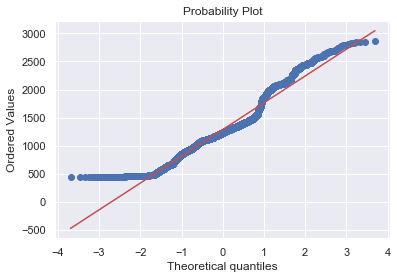

In [54]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

# Convert our data frame into time series

In [55]:
df_comp.date.describe() #the date is in proper way to display 

count           6269
unique          6269
top       16/06/2010
freq               1
Name: date, dtype: object

In [56]:
#frome text to date
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) #assume we are plugging in a string in a "mm/dd/yyyy"
#our data is save in a "dd/mm/yyyy" formate

In [57]:
#check the dataset to change the date formate
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [58]:
df_comp.date.describe() #we get more detail about time period 

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# setting the index
#each value should correspond to a time period.
#we often wish to examine specific chunks of data between two concrete dates.
#seperating  the data before & after september 15th 2008
#we need to use the associated time periods as indices

In [59]:
df_comp.set_index("date", inplace = True)

In [60]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [62]:
df_comp.date.describe() #error resion to check date become an index, we no longer save it's value as a seperate attribute in the data frame.
#AttributeError: 'DataFrame' object has no attribute 'date'

AttributeError: 'DataFrame' object has no attribute 'date'

# Setting the desired frequency 


# The values this argument can taken are specific letters of the alphabet
'h'- Hourly
'w'- Weekly
'd'- Daily
'm'- Monthly
'b'- Business Days (saturday & sunday not include)

In [63]:
df_comp = df_comp.asfreq('b')

In [64]:
df_comp.head() 


,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Handling Missing Values


In [65]:
df_comp.isna() 
#True- missing value for the period
#False-no missing value for the period

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


finding the missing value in dataset it's difficult then we convert into the 1 & 0
true= 1
false=0

In [66]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

setting the frequency to "business days " must have generated 8 dates, for which we have no data available.

"fillna()" method to filling missing values

1.) Front filling: assigns the value of the previous period.

2.) Back filling: Assigns the value for the next period.

3.) Assigning the same value: Assign the average to all the missing values within the time series.

In [67]:
df_comp.spx = df_comp.spx.fillna(method="ffill") #F

In [68]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [69]:
df_comp.ftse = df_comp.ftse.fillna(method="bfill") #B

In [70]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [71]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean() )

In [72]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [73]:
df_comp.nikkei = df_comp.nikkei.fillna(value = df_comp.dax.mean() )

# Simplifying the dataset

Analyzing how the S&P 500 performs.
We can remove the columns for the FTSE,DAX and NIKKEI.
1.)The less data we load, the faster we can manipulate it.
2.)Clarity. Easier to keep track of the dataset.

In [74]:
df_comp['market_value']=df_comp.spx #add column 

In [75]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14586.200842,1288.642547
std,487.868210,2752.604984,1145.568370,4051.956757,487.868210
min,438.920000,1911.700000,2876.600000,6080.063363,438.920000
25%,992.715221,4070.460000,4487.880000,10695.600000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [76]:
df_comp

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,469.900000
1994-01-10,475.270000,2225.00,3440.580000,18443.44,475.270000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,474.130000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,474.170000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,472.470000
...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,2839.130362
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,2837.544008
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,2839.253031


In [77]:
del df_comp['spx']

In [78]:
df_comp

,dax,ftse,nikkei,market_value
date,,,,
1994-01-07,2224.95,3445.980000,18124.01,469.900000
1994-01-10,2225.00,3440.580000,18443.44,475.270000
1994-01-11,2228.10,3413.770000,18485.25,474.130000
1994-01-12,2182.06,3372.020000,18793.88,474.170000
1994-01-13,2142.37,3360.010000,18577.26,472.470000
...,...,...,...,...
2018-01-23,13559.60,7731.827774,24124.15,2839.130362
2018-01-24,13414.74,7643.428966,23940.78,2837.544008
2018-01-25,13298.36,7615.839954,23669.49,2839.253031
